<h1><center>                                 RFM analysis

- Recency, frequency, monetary value (RFM) is a model used in marketing analysis that
  segments a company’s consumer base by their purchasing patterns or habits. 
- In particular, it evaluates customers’ recency (how long ago they made a purchase), 
  frequency (how often they make purchases), and monetary value (how much money they spend).
  


In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
dff=pd.read_excel(r'C:\Users\HARITHA\Desktop\Great Learning\Python\week-3\pandas\Sample - Superstore dataset.xlsx')
dff.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
dff.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# required columns are Customer ID, Order Date, Sales 

df=dff[['Customer ID','Order Date','Sales']]
df.head(2)


,Customer ID,Order Date,Sales
0,CG-12520,2016-11-08,261.96
1,CG-12520,2016-11-08,731.94


In [5]:
today=pd.to_datetime('today') # TIME STAMP : getting today's date
 
today=pd.to_datetime(today.date())        #only date, no time

# today=pd.Timestamp.now().date()

today

Timestamp('2024-01-03 00:00:00')

In [6]:
#getting recency in no of days ,from todays date to the last order date

df['Recency']=today-df['Order Date']
df.head(2)

,Customer ID,Order Date,Sales,Recency
0,CG-12520,2016-11-08,261.96,2612 days
1,CG-12520,2016-11-08,731.94,2612 days


In [7]:
# grouping data by customer id 
# aggreagting on recency for latest orders, customer id for count of each order, 
# sales to sum all previous orders values

grouped=df.groupby(by='Customer ID').agg({'Recency':'min',
                                         'Customer ID':'count',
                                         'Sales':'sum'})
grouped

,Recency,Customer ID,Sales
Customer ID,,,
AA-10315,2379 days,11,5563.560
AA-10375,2214 days,15,1056.390
AA-10480,2454 days,12,1790.512
AA-10645,2250 days,18,5086.935
AB-10015,2610 days,6,886.156
...,...,...,...
XP-21865,2238 days,28,2374.658
YC-21895,2199 days,8,5454.350
YS-21880,2204 days,12,6720.444


In [8]:
#renaming column names

grouped=grouped.rename(columns={'Customer ID':'Frequency','Sales':'Monetary'})
grouped.head(5)

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,2379 days,11,5563.560
AA-10375,2214 days,15,1056.390
AA-10480,2454 days,12,1790.512
AA-10645,2250 days,18,5086.935
AB-10015,2610 days,6,886.156


In [9]:
# creating 4 groups in the data using qcut

grouped['Q_Recency'] = pd.qcut(grouped["Recency"], 4, labels = False)
grouped['Q_Frequency'] =pd.qcut(grouped['Frequency'],4,labels=False)
grouped['Q_Monetary']=pd.qcut(grouped['Monetary'],4,labels=False)
grouped.head(5)

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary
Customer ID,,,,,,
AA-10315,2379 days,11,5563.560,3,1,3
AA-10375,2214 days,15,1056.390,0,2,0
AA-10480,2454 days,12,1790.512,3,1,1
AA-10645,2250 days,18,5086.935,1,3,3
AB-10015,2610 days,6,886.156,3,0,0


### Also, use Recency for campaigning 
- Up-Sell promotional ---> Active 
- Retention campaign ---> At Risk  
- Reactivation Compaign ---> Churned

In [10]:
#assigning status  to rencency values

Status=[]
for i in grouped['Q_Recency']:
    if i==0:
        Status.append('Active')        # lies in quartile 1
    elif i==1 or i==2:
        Status.append('Risky')         # lies in q2 or q3
    else:
        Status.append('churned')       # lies in q4

In [11]:
#adding Status column to the dataframe

a_series = pd.Series(Status).values
grouped['Status']=a_series

In [12]:
grouped

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary,Status
Customer ID,,,,,,,
AA-10315,2379 days,11,5563.560,3,1,3,churned
AA-10375,2214 days,15,1056.390,0,2,0,Active
AA-10480,2454 days,12,1790.512,3,1,1,churned
AA-10645,2250 days,18,5086.935,1,3,3,Risky
AB-10015,2610 days,6,886.156,3,0,0,churned
...,...,...,...,...,...,...,...
XP-21865,2238 days,28,2374.658,1,3,2,Risky
YC-21895,2199 days,8,5454.350,0,0,3,Active
YS-21880,2204 days,12,6720.444,0,1,3,Active


### Use the frequency & Monetary segmentation to estimate customer value.
Typical segment names:
- Premium
- Gold
- Silver,etc.


In [13]:
#assigning customer_value based on  q_frequency and q_monetary

f=grouped['Q_Frequency']
m=grouped['Q_Monetary']
a_sum={0:'',1:'',2:'Silver',3:'Silver',4:'Gold',5:'Gold',6:'Premium'}

total=f+m

grouped['CustomerValue']=total.map(a_sum)
grouped

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary,Status,CustomerValue
Customer ID,,,,,,,,
AA-10315,2379 days,11,5563.560,3,1,3,churned,Gold
AA-10375,2214 days,15,1056.390,0,2,0,Active,Silver
AA-10480,2454 days,12,1790.512,3,1,1,churned,Silver
AA-10645,2250 days,18,5086.935,1,3,3,Risky,Premium
AB-10015,2610 days,6,886.156,3,0,0,churned,
...,...,...,...,...,...,...,...,...
XP-21865,2238 days,28,2374.658,1,3,2,Risky,Gold
YC-21895,2199 days,8,5454.350,0,0,3,Active,Silver
YS-21880,2204 days,12,6720.444,0,1,3,Active,Gold


In [14]:
#  rename values for quartiles

labels={0:'Q1',1:'Q2',2:'Q3',3:'Q4'}

grouped['Q_Recency']=grouped['Q_Recency'].map(labels)
grouped['Q_Frequency'] = grouped['Q_Frequency'].map(labels)
grouped['Q_Monetary'] = grouped['Q_Monetary'].map(labels)

grouped

,Recency,Frequency,Monetary,Q_Recency,Q_Frequency,Q_Monetary,Status,CustomerValue
Customer ID,,,,,,,,
AA-10315,2379 days,11,5563.560,Q4,Q2,Q4,churned,Gold
AA-10375,2214 days,15,1056.390,Q1,Q3,Q1,Active,Silver
AA-10480,2454 days,12,1790.512,Q4,Q2,Q2,churned,Silver
AA-10645,2250 days,18,5086.935,Q2,Q4,Q4,Risky,Premium
AB-10015,2610 days,6,886.156,Q4,Q1,Q1,churned,
...,...,...,...,...,...,...,...,...
XP-21865,2238 days,28,2374.658,Q2,Q4,Q3,Risky,Gold
YC-21895,2199 days,8,5454.350,Q1,Q1,Q4,Active,Silver
YS-21880,2204 days,12,6720.444,Q1,Q2,Q4,Active,Gold


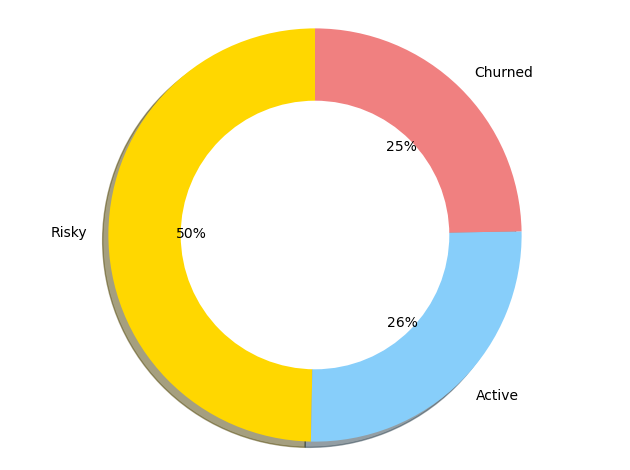

In [15]:
import matplotlib.pyplot as plt
new=list(grouped['Status'].value_counts())               #get a list to fed to the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(new, labels=["Risky","Active","Churned"] , autopct='%0.f%%', colors=colors, shadow=True, startangle=90) #create pie chart


# create donut from above pie chart
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()